In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My Drive/FastAI/main

/content/drive/My Drive/FastAI/main


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['uncased-l12-h768-a12', 'jigsaw-toxic-comment-classification-challenge', 'infineon']


In [0]:
from fastai.text import *

In [5]:
train = pd.read_csv("../input/infineon/infineonTrainDataTransformed.csv", encoding="ISO-8859-1")
train.head()

,id,comment_text,Natural Resources,Music and Audio,Platforms,Information Technology,Messaging and Telecommunications,Transportation,Consumer Goods,Real Estate,Video,Navigation and Mapping,Artificial Intelligence,Clothing and Apparel,Administrative Services,Energy,Travel and Tourism,Internet Services,Education,Commerce and Shopping,Sports,Lending and Investments,Sustainability,Biotechnology,Science and Engineering,Data and Analytics,Hardware,Content and Publishing,Gaming,Sales and Marketing,Financial Services,Government and Military,Mobile,Media and Entertainment,Events,Payments,Consumer Electronics,Health Care,Food and Beverage,Software,Professional Services,Design,Agriculture and Farming,Privacy and Security,Advertising,Manufacturing,Community and Lifestyle,Apps
0,35440,enlighted is an iot platform for commercial re...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13117,darrb is a platform that connects people who w...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,44816,grand perfecta is a leading provider of data a...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4710,iapp4me offers tools that enable its users to ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,26697,dealfaint provide top quality products and unp...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
train['comment_text'] = train['comment_text'].str.replace('([“”¨«»®´·º½¾¿¡§£₤‘’])', '')

In [0]:
train['comment_text'].isna().any()

True

In [0]:
train=train.dropna()

In [0]:
len(train)

40668

In [0]:
test = pd.read_csv("../input/infineon/infineonTestDataTransformed.csv", encoding="ISO-8859-1")

test_id = test['id']
test['comment_text'] = test['comment_text'].str.replace('([“”¨«»®´·º½¾¿¡§£₤‘’])', '')

In [0]:
test['comment_text'].isna().any()

True

In [0]:
test=test.dropna()

In [10]:
data = (TextList.from_df(train, cols='comment_text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,"- in - class sensor and analytics platform , we provide smart energy solutions for commercial buildings . our technology reduces costs and improves the comfort of workspaces and the efficiency of the people who work in them . \r\r \n \r\r \n our solutions go beyond theory . customers are saving millions in energy costs - up to 70 % in some instances - while making smarter business"
1,"station typically consists of dryers , compressors ( including those manufactured by clean energy compression ) , dispensers and storage tanks . equipment for a lng station typically consists of storage tanks and dispensing equipment . majority of the company?s fueling stations have separate public access areas for retail customers . \r\r\r\r \n \r\r\r\r \n the company also offers assessment , design and modification solutions to provide operators with"
2,"creating a social and community - driven experience fueled by inspired brands with stories to tell . storenvy was founded in 2010 and has received $ 6.5 million in funding from intel capital , spark capital , first round capital and others . the company is based in san francisco and is hiring . for more , take a peek inside at xxunk , inc . provides an online social"
3,"entertainment , education , music , shopping , video and social xxunk is a platform that will revolutionize the way we search and buy vr content . in recent years , large companies such as alphabet , amd , facebook , gopro , microsoft , nvidia , sony , samsung , htc and others have invested billions in the development of devices to virtual reality . in 2016 , multiple"
4,"after antonio meucci , the inventor of the telephone a ? "" and just like him , we believe that distance should have no meaning when reaching out to your loved ones , your friends , colleagues and whoever else comes to mind . \r\r \n \r\r \n wea?tre a team with big ideas , and we have found a way to use existing gsm networks to provide our"


In [11]:
learn = language_model_learner(data,AWD_LSTM, drop_mult=0.3)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


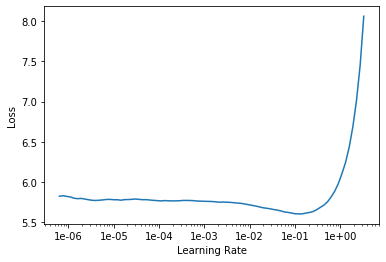

In [13]:
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(1, 2e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.524744,5.121209,0.211435,22:38


In [0]:
learn.save_encoder('fine_tuned_enc3')

In [0]:
label_cols = ['Natural Resources',
       'Music and Audio', 'Platforms', 'Information Technology',
       'Messaging and Telecommunications', 'Transportation', 'Consumer Goods',
       'Real Estate', 'Video', 'Navigation and Mapping',
       'Artificial Intelligence', 'Clothing and Apparel',
       'Administrative Services', 'Energy', 'Travel and Tourism',
       'Internet Services', 'Education', 'Commerce and Shopping', 'Sports',
       'Lending and Investments', 'Sustainability', 'Biotechnology',
       'Science and Engineering', 'Data and Analytics', 'Hardware',
       'Content and Publishing', 'Gaming', 'Sales and Marketing',
       'Financial Services', 'Government and Military', 'Mobile',
       'Media and Entertainment', 'Events', 'Payments', 'Consumer Electronics',
       'Health Care', 'Food and Beverage', 'Software', 'Professional Services',
       'Design', 'Agriculture and Farming', 'Privacy and Security',
       'Advertising', 'Manufacturing', 'Community and Lifestyle', 'Apps']

In [17]:
test_datalist = TextList.from_df(test, cols='comment_text', vocab=data.vocab)

data_clas = (TextList.from_df(train, cols='comment_text', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols , classes=label_cols)
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
"xxbos usg is north america s leading producer of gypsum wallboard , joint compound and a vast array of related products for the xxunk corporation is a manufacturer and distributor of innovative , high - performance building systems through its united states gypsum company , usg interiors , llc , and l&w supply corporation subsidiaries and its usg boral building products joint venture . headquartered in chicago , usg worldwide",Real Estate;Science and Engineering;Design;Manufacturing
"xxbos specializes in the design , merchandising , sales , and marketing of a variety of lifestyle branded activewear , apparel , and xxunk apparel , inc . specializes in the design , merchandising , sales , and marketing of a variety of lifestyle branded activewear , apparel , and headwear for men , women , juniors , youth and children at a wide range of price points . delta",Clothing and Apparel;Sales and Marketing;Design;Community and Lifestyle
"xxbos new york community bancorp , inc . is a bank holding company and a producer of multi - family mortgage loans in new york xxunk york community bancorp , inc . is a bank holding company and a producer of multi - family mortgage loans in new york city , with an emphasis on apartment buildings that feature below - market rents . it has two bank subsidiaries :",Real Estate;Lending and Investments;Financial Services;Community and Lifestyle
"xxbos zai is built on a vision that china would be the next destination for the pharmaceutical and healthcare xxunk is built on a vision that china would be the next destination for the pharmaceutical and healthcare industry , and that it would arrive as part of the global drug development landscape . zai is a result of the passion of people who come together to make this vision a",Information Technology;Biotechnology;Science and Engineering;Health Care
"xxbos monster digital designs and engineers data storage and memory products for professionals and xxunk monster digital designs and engineers advanced data storage and memory products for professionals and consumers who demand the very best . our memory card products for action sports cameras , mobile devices , and tablets feature rugged construction , rapid transfer rates , and capacities that help get the best performance out of each xxunk",Real Estate;Hardware;Mobile;Software


In [0]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn_classifier.load_encoder('fine_tuned_enc3')
learn_classifier.freeze() 


In [19]:
learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


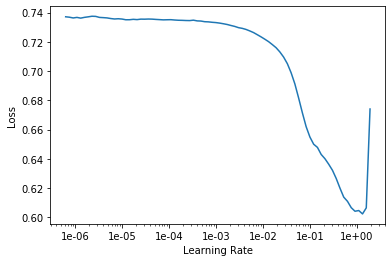

In [20]:
learn_classifier.recorder.plot()


In [21]:
learn_classifier.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,time
0,0.260058,0.244566,08:24


In [22]:
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(1, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.228826,0.269209,10:05


In [23]:
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.210374,0.473770,14:19


In [0]:
learn_classifier.show_results()

text,target,prediction
"xxbos usg is north america s leading producer of gypsum wallboard , joint compound and a vast array of related products for the xxunk corporation is a manufacturer and distributor of innovative , high - performance building systems through its united states gypsum company , usg interiors , llc , and l&w supply corporation subsidiaries and its usg boral building products joint venture . headquartered in chicago , usg worldwide",Real Estate;Science and Engineering;Design;Manufacturing,Hardware;Manufacturing
"xxbos search maximizer offers sem services , including search engine optimization , ppc advertising , and web analytics xxunk maximizer co . ,ltd a a1a,?a a , a?a a , a2a a1a,?a a , a?oa a1a?!a a , a""ca a , a!a a , a?a a , a?a a , aca a , a?a a , a?""a a , a?""a a , a?a a1e?a a , a?a a , a?a",Internet Services;Sales and Marketing;Media and Entertainment;Advertising,Internet Services;Sales and Marketing;Software;Advertising
"xxbos xxunk de venezuela s.a . , the state - owned corporation of the bolivarian republic of venezuela , is responsible for the efficient , xxunk de venezuela s.a . , the state - owned corporation of the bolivarian republic of venezuela , is responsible for the efficient , profitable , and dependable exploration , production , refining , transport and commerce of hydrocarbons . this company is deeply committed",Natural Resources;Energy;Sustainability;Government and Military,Natural Resources;Energy;Sustainability;Manufacturing
"xxbos specializes in the design , merchandising , sales , and marketing of a variety of lifestyle branded activewear , apparel , and xxunk apparel , inc . specializes in the design , merchandising , sales , and marketing of a variety of lifestyle branded activewear , apparel , and headwear for men , women , juniors , youth and children at a wide range of price points . delta",Clothing and Apparel;Sales and Marketing;Design;Community and Lifestyle,Clothing and Apparel;Commerce and Shopping;Design
"xxbos semiconductor manufacturing international corporation ( smic ) is a semiconductor foundry providing ic foundry and technology xxunk manufacturing international corporation ( smic ) is a semiconductor foundry providing integrated circuit ( ic ) foundry and technology services at xxunk to xxunk . \r\r \n \r\r \n smic develops one - stop turnkey services to meet its customersa?t needs . in addition to ic manufacturing , smic offers a",Science and Engineering;Hardware;Software;Manufacturing,Science and Engineering;Hardware;Consumer Electronics;Manufacturing


In [0]:
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = preds.numpy()

In [0]:
DatasetType.Test

<enum 'DatasetType'>

In [0]:
labels

array([[5.742669e-05, 1.502308e-02, 1.504533e-01, 1.239170e-01, ..., 9.630662e-01, 2.015550e-04, 3.737776e-03,
        3.190717e-01],
       [2.938087e-04, 5.126411e-02, 6.667857e-01, 8.490101e-02, ..., 3.601201e-02, 5.233914e-04, 3.148078e-02,
        6.975467e-01],
       [1.476271e-02, 1.804595e-04, 2.695706e-02, 6.116721e-01, ..., 5.145220e-03, 1.063731e-02, 9.954650e-03,
        1.069774e-01],
       [7.390340e-02, 5.020699e-03, 3.282810e-03, 2.087206e-01, ..., 5.752926e-04, 8.054350e-01, 1.745648e-03,
        5.191572e-03],
       ...,
       [3.858107e-04, 1.595711e-02, 1.148299e-02, 2.343768e-01, ..., 1.363973e-02, 4.631028e-04, 2.507976e-01,
        7.046671e-02],
       [7.052256e-05, 3.529894e-05, 4.793109e-04, 5.922393e-01, ..., 7.222577e-04, 1.661314e-03, 3.470992e-03,
        1.509122e-02],
       [1.205025e-02, 1.982202e-03, 2.658552e-02, 6.972497e-01, ..., 5.579676e-03, 3.070781e-01, 7.847086e-03,
        6.287895e-02],
       [1.219300e-02, 4.155964e-03, 2.083518e-03, 

In [0]:
target

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
submission = pd.DataFrame({'id': test_id})
submission = pd.concat([submission, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)

submission.to_csv('submission.csv', index=False)
submission.head()

,id,Natural Resources,Music and Audio,Platforms,Information Technology,Messaging and Telecommunications,Transportation,Consumer Goods,Real Estate,Video,Navigation and Mapping,Artificial Intelligence,Clothing and Apparel,Administrative Services,Energy,Travel and Tourism,Internet Services,Education,Commerce and Shopping,Sports,Lending and Investments,Sustainability,Biotechnology,Science and Engineering,Data and Analytics,Hardware,Content and Publishing,Gaming,Sales and Marketing,Financial Services,Government and Military,Mobile,Media and Entertainment,Events,Payments,Consumer Electronics,Health Care,Food and Beverage,Software,Professional Services,Design,Agriculture and Farming,Privacy and Security,Advertising,Manufacturing,Community and Lifestyle,Apps
0,53591,0.000057,0.015023,0.150453,0.123917,0.026466,0.001451,0.000553,0.001109,0.067935,0.347251,0.044868,0.001260,0.000193,0.000660,0.004929,0.547428,0.000514,0.037215,0.002808,0.001534,0.000518,0.000670,0.026754,0.558689,0.038859,0.078529,0.007611,0.967096,0.007119,0.001433,0.880029,0.455991,0.007008,0.002009,0.006901,0.002667,0.001223,0.603608,0.002783,0.046816,0.000164,0.008510,0.963066,0.000202,0.003738,0.319072
1,45826,0.000294,0.051264,0.666786,0.084901,0.014085,0.002056,0.002721,0.004715,0.325105,0.057366,0.008732,0.001311,0.000400,0.000210,0.007003,0.469319,0.031935,0.039596,0.004222,0.000669,0.000872,0.000635,0.013147,0.104162,0.111289,0.595321,0.043694,0.051258,0.011327,0.001307,0.932301,0.869271,0.009074,0.006537,0.053143,0.003853,0.000961,0.897799,0.004196,0.025696,0.000106,0.005666,0.036012,0.000523,0.031481,0.697547
2,76744,0.014763,0.000180,0.026957,0.611672,0.002233,0.049517,0.003223,0.084018,0.001579,0.217489,0.155999,0.000704,0.002659,0.064324,0.007585,0.512769,0.002722,0.026460,0.000914,0.005565,0.061928,0.006236,0.224651,0.855074,0.357472,0.011656,0.000520,0.064211,0.020755,0.025613,0.245317,0.031049,0.001802,0.002671,0.128043,0.013611,0.001157,0.923296,0.027381,0.115845,0.019124,0.040532,0.005145,0.010637,0.009955,0.106977
3,51517,0.073903,0.005021,0.003283,0.208721,0.001028,0.189841,0.004205,0.049597,0.003504,0.001352,0.004302,0.000693,0.004247,0.555196,0.000422,0.076036,0.000985,0.024079,0.001325,0.001399,0.196403,0.001188,0.166576,0.022741,0.876891,0.002634,0.000071,0.019881,0.005225,0.007672,0.034546,0.023982,0.000482,0.000179,0.608977,0.003667,0.000220,0.266343,0.011603,0.048791,0.000465,0.004425,0.000575,0.805435,0.001746,0.005192
4,44883,0.006920,0.000352,0.001821,0.196559,0.000665,0.009278,0.001792,0.036304,0.000806,0.001808,0.877461,0.000425,0.000940,0.010228,0.001483,0.089722,0.007961,0.052778,0.000205,0.662494,0.008683,0.015478,0.679822,0.892209,0.115929,0.003424,0.002111,0.032298,0.967959,0.001337,0.043045,0.018302,0.000478,0.276221,0.034408,0.018831,0.000305,0.939709,0.043561,0.023663,0.006340,0.036964,0.004524,0.003997,0.002442,0.017417


In [0]:
copySubmission = submission.copy()
mySubmission = pd.DataFrame()
mySubmission['documentId']= submission['id']
mySubmission['category_groups_list']=''

for index, row in copySubmission.iterrows():
  myStr=''
  myList=list(row[1:])
  myList.sort(reverse=True)
  print(row[0])
  print("-------")
  print(row[1])
  if math.isnan(myList[0])==False:
    myStr=myStr+copySubmission.columns[list(row).index(myList[0])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[1])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[2])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[3])]
    mySubmission.at[index,'category_groups_list']=myStr
    #print(myStr)
  else :
    mySubmission.at[index,'category_groups_list']=' NaN '
  #print(myList)
  

mySubmission.to_csv('mySubmission.csv', index=False)





53591.0
-------
5.742668508901261e-05
45826.0
-------
0.00029380866908468306
76744.0
-------
0.01476271077990532
51517.0
-------
0.0739033967256546
44883.0
-------
0.006920410320162773
60983.0
-------
9.88976753433235e-05
71046.0
-------
0.0015570690156891942
3780.0
-------
0.0023493582848459482
2782.0
-------
9.270755253965035e-05
7105.0
-------
0.00029524241108447313
49132.0
-------
0.0008317631436511874
2651.0
-------
0.021059896796941757
7515.0
-------
0.02325463853776455
42233.0
-------
0.0007088886923156679
71054.0
-------
0.0007376984576694667
52288.0
-------
0.002953635063022375
30643.0
-------
0.0015510235680267215
50589.0
-------
0.001182425650767982
26194.0
-------
0.000976698356680572
4500.0
-------
0.36581259965896606
63904.0
-------
0.0003259441291447729
16473.0
-------
0.0004875119775533676
53851.0
-------
0.0009443090530112386
66878.0
-------
0.00031218634103424847
75731.0
-------
0.03903103247284889
16590.0
-------
0.0003322407719679177
77107.0
-------
0.01018905825912

In [0]:
len(mySubmission)

5000